
Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



[1] 41
[1] 39


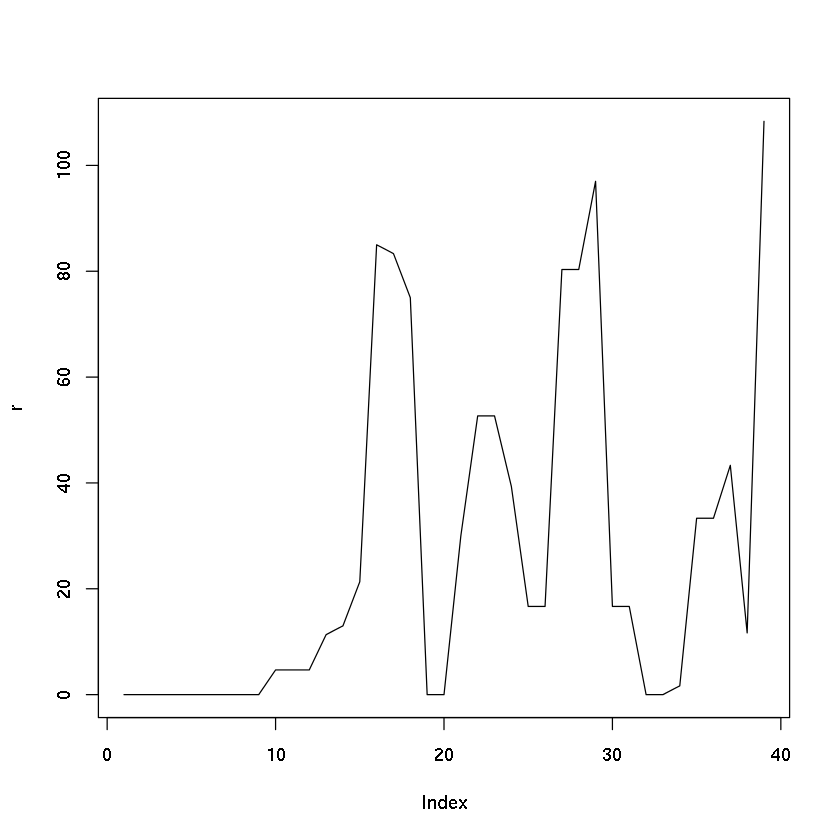

In [2]:
library(zoo)
library(nlme)

biz <- c(rep(0,11),
         14,
         0, 0,
         34,
         5,
         25,
         225,
         0,0, 0,0,
         90,
         68,
         0,
         50,
         0,0,
         241,
         0, 50,0,0,0,0,
         5, 95, 0, 35,
         0, 290)


r <- rollmean(biz, 3)
print(length(biz))
print(length(r))
plot(r, type = "l")

[1] 32.69171

[1] 0.09918957

[1] 0.5762912

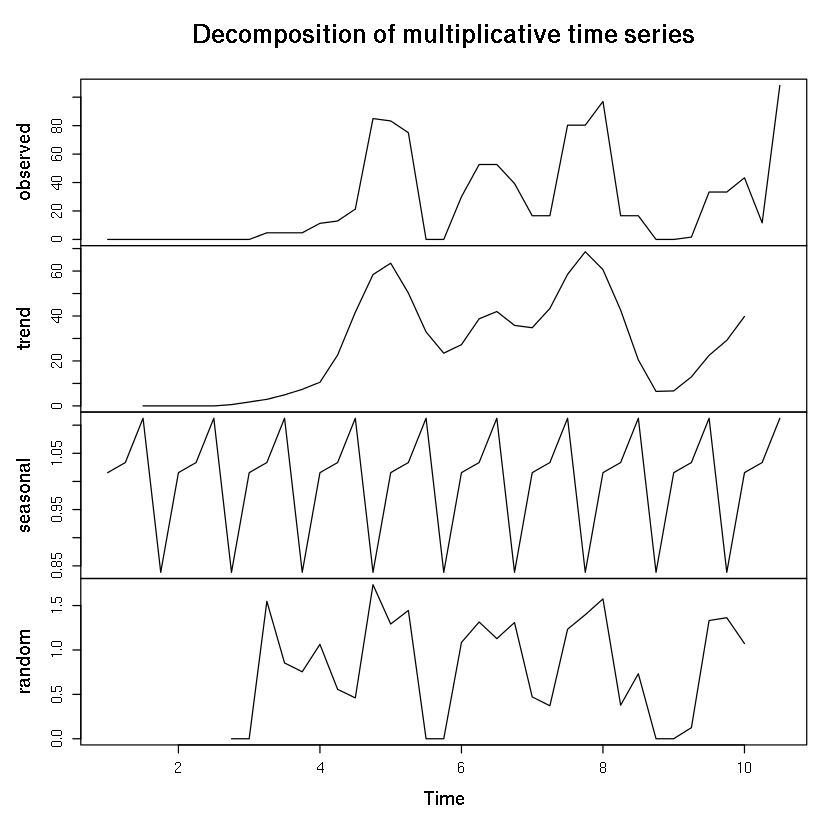

In [3]:
biz.ts <- ts(r, frequency = 4)
d <- (decompose(biz.ts, type = "multiplicative"))
plot(d)
sd(biz.ts)
sd(d$seasonal)
sd(d$random, na.rm = T)

In [4]:
Time <- time(biz.ts)
biz.lm <- lm(r ~ Time + I(Time^2) + I(Time^3) + I(Time^4))
summary(biz.lm)


Call:
lm(formula = r ~ Time + I(Time^2) + I(Time^3) + I(Time^4))

Residuals:
    Min      1Q  Median      3Q     Max 
-47.568 -14.452  -2.359   6.700  66.689 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)   92.0058    59.0259   1.559   0.1283  
Time        -120.0408    59.2826  -2.025   0.0508 .
I(Time^2)     46.1786    19.0184   2.428   0.0206 *
I(Time^3)     -6.2106     2.4027  -2.585   0.0142 *
I(Time^4)      0.2742     0.1039   2.639   0.0124 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.64 on 34 degrees of freedom
Multiple R-squared:  0.3604,	Adjusted R-squared:  0.2851 
F-statistic: 4.789 on 4 and 34 DF,  p-value: 0.003579


In [5]:
biz.lmb <- step(biz.lm, trace = 0)
summary(biz.lmb)
AIC(biz.lmb)


Call:
lm(formula = r ~ Time + I(Time^2) + I(Time^3) + I(Time^4))

Residuals:
    Min      1Q  Median      3Q     Max 
-47.568 -14.452  -2.359   6.700  66.689 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)   92.0058    59.0259   1.559   0.1283  
Time        -120.0408    59.2826  -2.025   0.0508 .
I(Time^2)     46.1786    19.0184   2.428   0.0206 *
I(Time^3)     -6.2106     2.4027  -2.585   0.0142 *
I(Time^4)      0.2742     0.1039   2.639   0.0124 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.64 on 34 degrees of freedom
Multiple R-squared:  0.3604,	Adjusted R-squared:  0.2851 
F-statistic: 4.789 on 4 and 34 DF,  p-value: 0.003579


[1] 376.2323

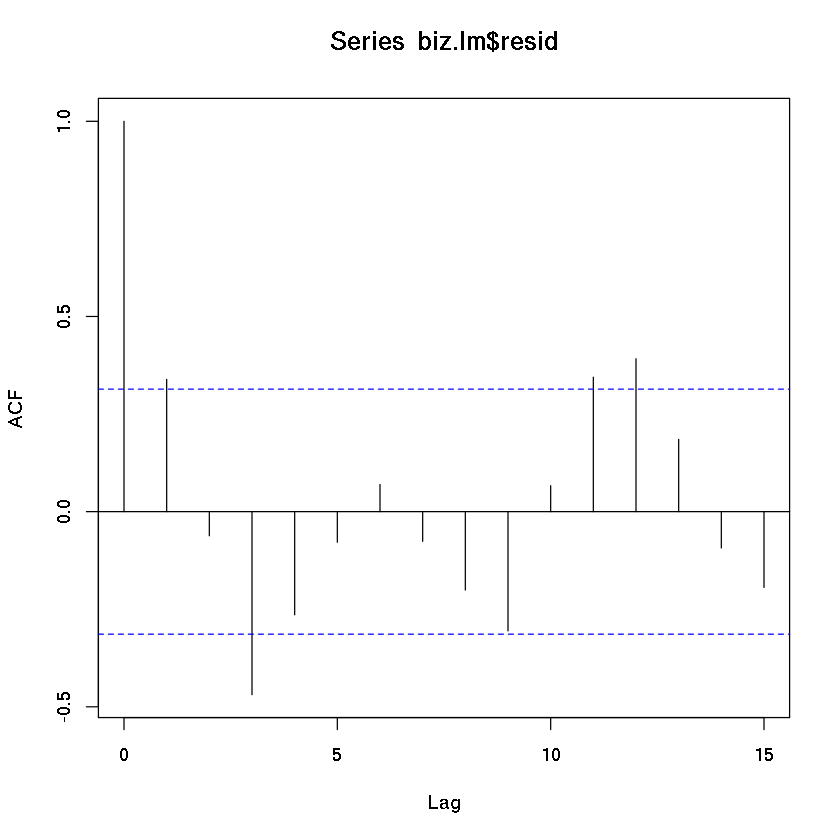

In [6]:
plot(acf(biz.lm$resid))

In [7]:
biz.ar <- arima(biz.lm$resid, order = c(3,3,3))
biz.ar
AIC(biz.ar)


Call:
arima(x = biz.lm$resid, order = c(3, 3, 3))

Coefficients:
          ar1      ar2      ar3      ma1     ma2      ma3
      -0.0550  -0.0213  -0.5767  -2.0772  1.1815  -0.0914
s.e.   0.2408   0.1501   0.1456   0.3536  0.6613   0.3245

sigma^2 estimated as 606.7:  log likelihood = -173.2,  aic = 360.39

[1] 360.3936

In [8]:
t <- (Time - mean(Time)) / sd(Time)
biz.gls <- gls(r ~ t + I(t^2),
               correlation = corAR1(0.4))
biz.gls
AIC(biz.gls)

Generalized least squares fit by REML
  Model: r ~ t + I(t^2) 
  Data: NULL 
  Log-restricted-likelihood: -173.1239

Coefficients:
(Intercept)           t      I(t^2) 
 28.9544825  17.9169086  -0.2307793 

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.6266564 
Degrees of freedom: 39 total; 36 residual
Residual standard error: 35.01991 

[1] 356.2478

In [9]:
sd(Time)

[1] 2.850439

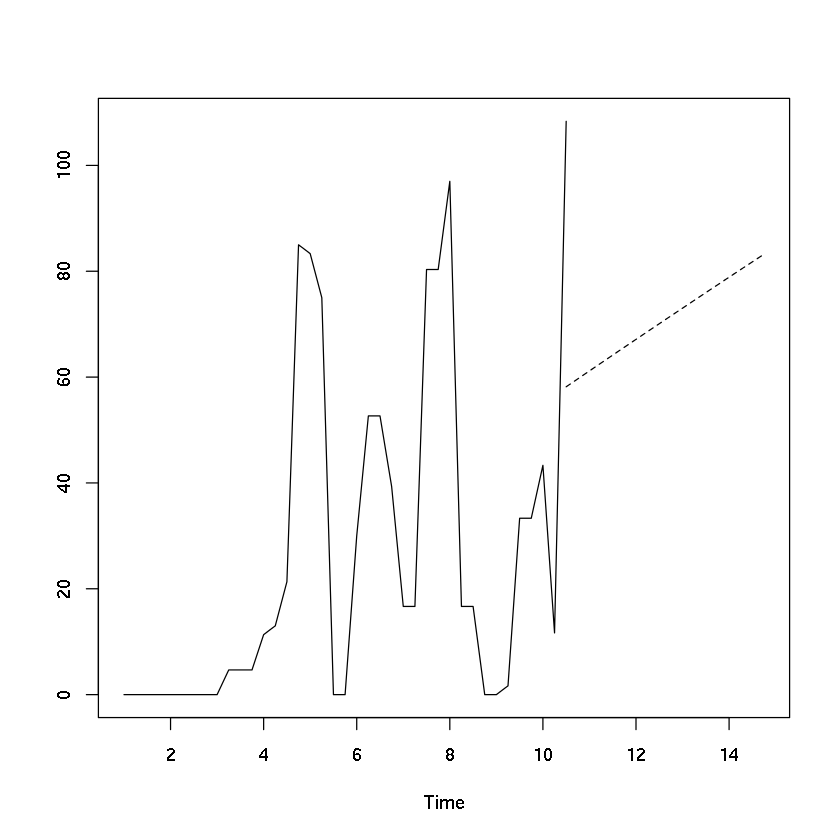

In [10]:
new.ts <- time(ts(start = end(Time), end = c(14, 4), frequency = 4))
new.t <- (new.ts - mean(Time)) / sd(Time)
new.df <- data.frame(t = new.t)
biz.pred.gls <- ts( predict(biz.gls, new.df), start = start(new.ts), end = end(new.ts), frequency = 4)
ts.plot(biz.ts, biz.pred.gls, lty = 1:2)

In [28]:
biz.ar <- arima(biz.ts, order = c(2,2,2))
biz.ar


Call:
arima(x = biz.ts, order = c(2, 2, 2))

Coefficients:
          ar1     ar2     ma1      ma2
      -0.7552  0.1537  -0.254  -0.7460
s.e.   0.2611  0.2012   0.212   0.2054

sigma^2 estimated as 854.9:  log likelihood = -179.31,  aic = 368.62

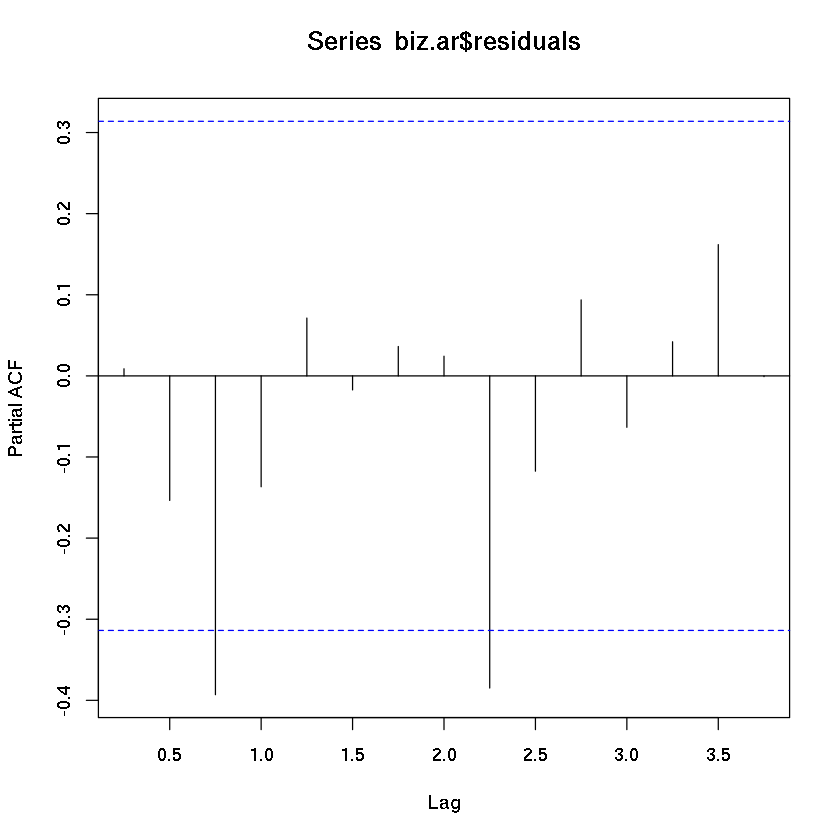

In [29]:
pacf(biz.ar$residuals)

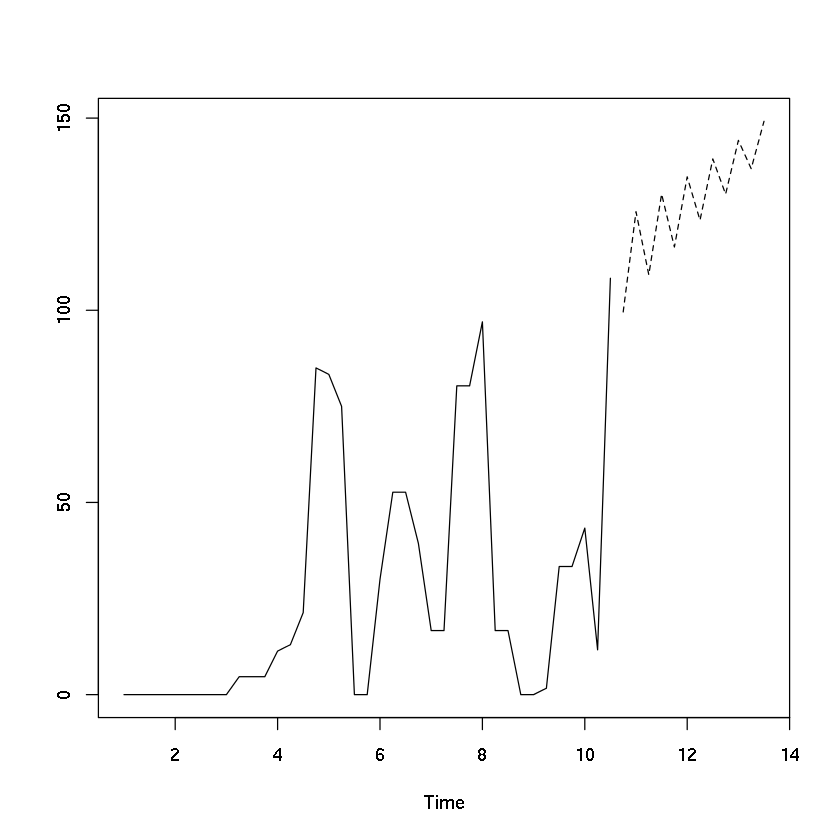

In [32]:
biz.pred.ar <- predict(biz.ar, n.ahead = 12)
biz.pred.ts <- ts(biz.pred.ar$pred, start = end(biz.ts) + c(0,1), frequency = 4)
ts.plot(biz.ts, biz.pred.ts, lty = 1:2)